#MINERIA DE DATOS

```
ACTIVIDAD   03 REGLA DE ASOCIACION 
NOMBRE: CESAR RODRIGO TTITO QUILCA
CODIGO: 140998  

```

##IMPLEMENTAR EL ALGORITMO APRIORI


> En este cuaderno implementaremos el algoritmo Apriori para ser probada sobre una dataset nombrada **spotify.npy**. Posteriormente haremos las reglas de asociación que presenten altos valores para ciertas métricas y se analizan separadamente, visualizar un conjunto de reglas de asociación según sus métricas asociadas.



##LIBRERIAS

> **Librerias de la actividad**

*   ***numpy:*** se utilizó para cargar los datos del Spotify RecSys Challenge, que venían en una arreglo serializado de numpy.
*   ***pandas:*** librería empleada para obtener el contador de soporte de las canciones.
*   ***intertools:***  union de dos vectores que transforma un objeto
*   ***networkx:*** generación de gráficos y facilidades para leer y escribir gráficos

> **Librerias Opcionales**

* ***collections:*** se usó su clase defaultdict, para formar los diccionarios con los contadores de soporte de cada itemset.




In [148]:
#librerias utilizables
import pandas as pd
import numpy as np
import networkx as nx
from itertools import chain
#librerias opcionales
from collections import defaultdict
import collections

##LEER DATA SET



> Para leer el dataset  **spotify.npy** se necesito de la funcion load de la libreria numpy



In [150]:
dataset = np.load('spotify.npy',allow_pickle=True)[()]
dataset = {x: set(dataset[x]) for x in dataset}
print("¿Cuantas canciones tiene el dataset: ",len(dataset))

¿Cuantas canciones tiene el dataset:  10000




> Para un soporte adecuado, nos conviene juntar las distintas canciones del data set en un solo parametro.



##IMPLEMENTACION



> **¿Que parametros utilizaremos?**
* ***dataset:*** corresponde a la base de datos, en forma de numpy.array.
* ***dict_count:*** El date de transaccion str tambien visto como la lista de canciones que se encuentra en el *spotify.npy*
* ***groups:*** Agrupacion de itemsets.
* ***size:*** Definieremos el tamaño de los itemsets.
* ***initial_order:*** Ordenaremos el tamaño de la agrupacion de los itemstes
* ***playlist*** Lista de itemsets
* ***min_support:*** soporte mínimo para que un itemset sea considerado frecuente.
* ***confidence:*** confianza mínima para que cierta regla de asociación sea retornada.
* ***lift:*** lift mínimo para que cierta regla de asociación sea retornada.
* ***frequent_itemsets:*** bases de datos relacionales y otros repositorios de información.




**¿Que Metodos utilizaremos?**
* ***conteo_inicio:*** Realiza un conteo en cada cancion en todas las listas.
* ***eliminar_elementos:*** Realiza la eliminacion de los itemsets que no cumplan con el umbral de soporte.
* ***combinacion:*** Realiza las combinaciones de itemsets segun un orden.
* ***get_frequent_itemsets:*** Obtenemos los itemsets de mayor tamaño, que cumplan con el umbral de soporte.
* ***generate_association_rules:*** Recibe los itemsets frecuentes generados por la función anterior y retorna las
reglas de asociación.
* ***encontrar_lift:*** buscar soporte de itemset en el dataset


---

Conteo inicial de todas las canciones, calcularemos el 
comienzo de cada cancion debido a que es común para la implementaciones del algoritmo apriori

---



In [152]:
def conteo_inicio(dataset):
    dict_count = defaultdict(int)
    for key in dataset:
        for value in dataset[key]:
            dict_count[tuple([value])] += 1
    return dict_count
playlists = conteo_inicio(dataset)
playlists

defaultdict(int,
            {("Stacy's Mom",): 126,
             ('Party In The U.S.A.',): 211,
             ('Dirty Little Secret',): 105,
             ('Say My Name',): 266,
             ('Beep',): 7,
             ('Replay',): 149,
             ('My Boo',): 92,
             ('Year 3000',): 74,
             ('One Less Lonely Girl',): 24,
             ('Lip Gloss',): 51,
             ('Check On It - feat. Bun B and Slim Thug',): 25,
             ('Rock Your Body',): 87,
             ('Hey Ya! - Radio Mix / Club Mix',): 203,
             ('Forever',): 321,
             ('Right Where You Want Me - Radio Edit Version',): 9,
             ('Ice Box',): 19,
             ('Mr. Brightside',): 248,
             ('Toxic',): 125,
             ('Your Love Is My Drug',): 62,
             ('This Is Me',): 43,
             ('See You Again',): 103,
             ('My Happy Ending',): 17,
             ('Beautiful Soul',): 97,
             ('Miss Independent',): 118,
             ('Promiscuous',): 160,


---

Eliminaremos cada cancion que no cumple con el requisito del umbral minimo

---

In [154]:
def eliminar_elementos(dict_count, min_support):
    new_dict = defaultdict(int)
    for (x, y) in dict_count.items():
        if y >= min_support:
            new_dict[x] = y
    return new_dict


---

Realizamos la combinacion de canciones por orden

---

In [156]:
def combinacion(groups, size, initial_order):
    i = 0
    j = 1
    k = (size - 2)
    new_itemsets = list()
    while i < len(groups):
        next_item = False
        while j < len(groups) and not next_item:
            accepted = True
            if size != 2:
                for m in range(k):
                    if groups[i][m] != groups[j][m]:
                        accepted = False
                        next_item = True
            if groups[i][-1] == groups[j][-1]:
                accepted = False
            if accepted:
                new_itemsets.append(tuple(sorted(set(groups[i] + groups[j]), key=lambda x: initial_order.index(x))))
            j += 1
        i += 1
        j = i + 1 
    return new_itemsets

---

`get_frequent_itemsets:`Es la Esctructura de datos que contiene lista de canciones y retorna  los itemsets frecuentes, bajo un umbral mínimo de confianza.

---

In [157]:

def get_frequent_itemsets(dataset, playlists, min_support):
    size = 2
    dict_count = eliminar_elementos(playlists, min_support)
    initial_order = sorted([x[0] for x in dict_count], key=lambda x: dict_count[(x,)], reverse=True)
    itemsets = [(x,) for x in initial_order]
    itemsets = combinacion(itemsets, size, initial_order)
    
    current_dict = dict()
    dict_count = defaultdict(int)
    while itemsets:
         
        
        for itemset in itemsets:
            
            i = set(itemset)
            count = 0
            for column in dataset:
                if i.issubset(dataset[column]):
                    count += 1
            dict_count[itemset] += count
                    
        size+=1
        
        dict_count = eliminar_elementos(dict_count, min_support)
        if len(dict_count) > 0:
            current_dict = dict_count
        itemsets = [x for x in itemsets if x in dict_count]
        itemsets = combinacion(itemsets, size, initial_order)
        
    current_dict = {frozenset(x): current_dict[x] for x in current_dict}
        
    return current_dict

---

Para este este caso solo obtenemos los itemest que obtendra un bajo un umbral mínimo de confianza.

---

In [161]:
frequent_itemsets1 = get_frequent_itemsets(dataset, playlists, 120)
keys = frequent_itemsets1.keys()
dato = {'antecedente': [set(key) for key in keys], 'consecuente': [frequent_itemsets1[key] for key in keys]}
dato1 = pd.DataFrame(data=dato)
dato1 = dato1[['antecedente', 'consecuente']]
dato1

,antecedente,consecuente
0,"{Closer, Roses}",139
1,"{Closer, One Dance}",121
2,"{Closer, Let Me Love You}",159
3,"{Closer, Don't Let Me Down}",149
4,"{Closer, Cold Water (feat. Justin Bieber & MØ)}",145
...,...,...
73,"{Fake Love, Bounce Back}",120
74,"{Trap Queen, 679 (feat. Remy Boyz)}",122
75,"{XO TOUR Llif3, Congratulations, HUMBLE.}",128
76,"{Mask Off, Congratulations, HUMBLE.}",121


---

para generar las reglas de asociaciones necesitamos encontrar el soporte de la musica en el dataset

---

In [162]:
def encontrar_lift(dataset, x):
    support = 0
    for column in dataset:
        if x.issubset(dataset[column]):
            support += 1
    return support

---

`generate_association_rules:` Genera las reglas de asociacion segun distintos criterios, a partir de  los itemsets frecuentes.
Se utilizan para descubrir hechos que ocurren en común dentro de un determinado conjunto de datos en este caso nuestro dataset *spotify.npy*.Se investigo ampliamente la dataset para asi descubrir relaciones entre las diferentes

---

In [163]:
def generate_association_rules(dataset, playlists, frequent_itemsets, support, confidence):

    length_db = len(dataset)
    
    rules = list()
    for itemset in frequent_itemsets:
        itemset = [tuple([x]) for x in itemset]
        size = 2
        length = len(itemset)
        initial_order = sorted([x[0] for x in itemset], key=lambda x: playlists[(x,)], reverse=True)
        groups = list()
        while size <= length:
            c = sorted(combinacion(itemset, size, initial_order), key=lambda x: x[:len(x)-1])
            itemset = c      
            groups.append(c)
            size += 1
        
        for m in range(len(groups)):

            if m == 0:
                for g in groups[m]:
                    r1 = [[g[0]], [g[1]]]
                    r2 = [[g[1]], [g[0]]]
                    if r1 not in rules:
                        rules.append(r1)
                    if r2 not in rules:
                        rules.append(r2)
                        
            else:
                for g in groups[m-1]:
                    
                    for item in initial_order:
                        
                        if item not in g:
                            r1 = [list(g), [item]]
                            r2 = [[item], list(g)]
                            if r1 not in rules:
                                rules.append(r1)
                            if r2 not in rules:
                                rules.append(r2)
                            
        
    info = list()
    for rule in rules:
        x_support = encontrar_lift(dataset, set(rule[0]))/length_db
        y_support = encontrar_lift(dataset, set(rule[1]))/length_db
        
        rule_str = ", ".join(rule[0]) + " -> " + ",".join(rule[1])
    
        support_db = encontrar_lift(dataset, set(x for x in chain(rule[0], rule[1])))/length_db
        confidence = support_db / x_support
        lift = support_db / (x_support * y_support)
        
        info.append((rule_str, support_db, confidence, lift))

    
    
    info = list(filter(lambda x: x[2] >= confidence and x[1] >= support, info))
    info = sorted(info, key=lambda x: (x[2], x[3]), reverse=True)
    return list(zip(*info[:10]))


----

resultado obtenido de la reglas asociadas

---

In [165]:
informacion = generate_association_rules(dataset, playlists, frequent_itemsets1, 0.0020,0.5)
d1 = {'playmusic': informacion[0], 'Support': informacion[1], 'Confidence': informacion[2], 'Lift': informacion[3]}
df1 = pd.DataFrame(data=d1)
df1 = df1[['playmusic', 'Support', 'Confidence', 'Lift']]
df1.style.set_properties(**{'background-color': 'black',
                           'color': 'lawnblack',
                           'border-color': 'blue'})

,playmusic,Support,Confidence,Lift
0,DNA. -> HUMBLE.,0.019000,0.822511,17.688405
1,"XO TOUR Llif3, Mask Off -> HUMBLE.",0.013100,0.803681,17.283462
2,"Congratulations, Mask Off -> HUMBLE.",0.012100,0.746914,16.062658
3,"Congratulations, XO TOUR Llif3 -> HUMBLE.",0.012800,0.715084,15.378146
4,Too Good -> One Dance,0.013200,0.653465,15.899400
5,Mask Off -> HUMBLE.,0.020400,0.645570,13.883218
6,Drowning (feat. Kodak Black) -> XO TOUR Llif3,0.012400,0.642487,19.891240
7,"HUMBLE., XO TOUR Llif3 -> Mask Off",0.013100,0.642157,20.321420
8,"HUMBLE., Mask Off -> XO TOUR Llif3",0.013100,0.642157,19.881017
9,XO TOUR Llif3 -> HUMBLE.,0.020400,0.631579,13.582343


##EXPLICACION DE REGLAS OBTENIDAS 


---

confianza = 0.0020

elevacion = 0.5

---

###REGLA 1

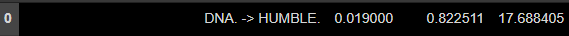

En Este Musica se obtuvo un apoyo de 0.019000 en donde la confianza fue de 82.2%  de que la musica fuera buscado en el dataset, y tuvo un alzamiento de 17.68 de que la musica sea popular.

###REGLA 2

image.png

En Este Musica se obtuvo un apoyo de 0.013100 en donde la confianza fue de 80.3%  de que la musica fuera buscado en el dataset, y tuvo un alzamiento de 17.28 de que la musica sea popular.

###REGLA 3

image.png

En Este Musica se obtuvo un apoyo de 0.013200 en donde la confianza fue de 65.34%  de que la musica fuera buscado en el dataset, y tuvo un alzamiento de 15.89 de que la musica sea popular.

###REGLA 4

image.png

En Este Musica se obtuvo un apoyo de 0.0204 en donde la confianza fue de 0.6315%  de que la musica fuera buscado en el dataset, y tuvo un alzamiento de 13.58 de que la musica sea popular.